In [44]:
library(ggplot2)
library(stringr)
theme_set(theme_bw())
options(repr.plot.width=8, repr.plot.height=5)

# Introduction

We have learned a little bit about the eukaryotic identity elements. If we test the full set (50 bit+) of tRNAs versus the quality set, we can learn about and dig into areas where the quality set may not be so high quality, and where the discovered identity elements may be inaccurate. The quality set is a subset of the full set of tRNAs, and has filtered for a few things, such as secondary structure score and isotype model-anticodon matching.

## 20ab

tRNAs contain a variable number of [insertions at position 20](http://zam.soe.ucsc.edu:5959/notebooks/identity/euk-isotypes/euk-tRNAs.ipynb#20a/20b). Does the quality set show a different distribution compared with the full set?

In [34]:
identities = read.delim('identities.tsv', sep='\t')
identities$quality = as.logical(identities$quality)
identities$restrict = as.logical(identities$restrict)

In [56]:
insertionab = paste0(identities$X20i1, identities$X20i2, identities$X20i3, identities$X20i4, identities$X20i5, identities$X20i6, identities$X20i7, identities$X20i8, identities$X20i9, identities$X20i10)
insertionab = str_replace_all(insertionab, '\\.', '')
insertionab = data.frame(table(nchar(insertionab)), Set='Full')
df = identities[identities$quality, ]
insertionab = rbind(insertionab, data.frame(table(nchar(str_replace_all(paste0(df$X20i1, df$X20i2, df$X20i3, df$X20i4, df$X20i5, df$X20i6, df$X20i7, df$X20i8, df$X20i9, df$X20i10), "\\.", ""))),
                                           Set='Quality'))
colnames(insertionab) = c("Size", "tRNAs", "Set")

,Size,tRNAs,Set
1,0,59682,Full
2,1,50085,Full
3,2,372,Full
4,3,68,Full
5,4,19,Full
6,5,8,Full
7,6,1,Full
8,7,2,Full
9,10,1,Full
10,0,32125,Quality


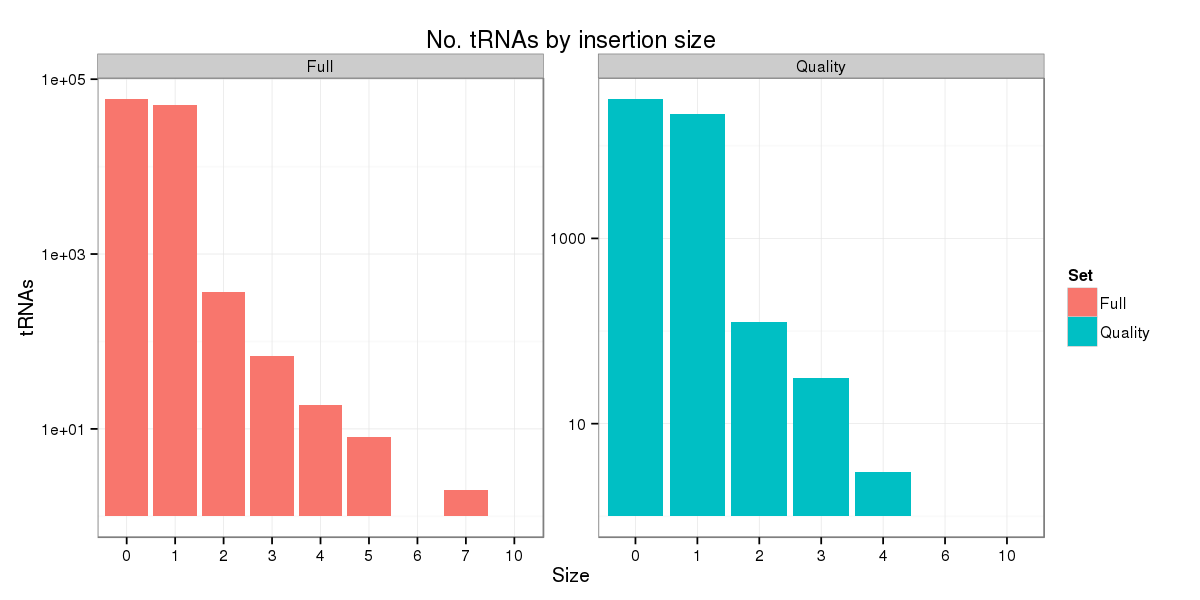

In [63]:
insertionab
options(repr.plot.width=10, repr.plot.height=5)
ggplot(insertionab) + geom_bar(aes(x=Size, y=tRNAs, fill=Set), position='dodge', stat='identity') + scale_y_continuous(trans='log10') + facet_wrap(~ Set, scales='free') + ggtitle("No. tRNAs by insertion size")

In [64]:
t.test(insertionab[insertionab$Set == "Quality", ]$tRNAs, insertionab[insertionab$Set == "Full", ]$tRNAs)


	Welch Two Sample t-test

data:  insertionab[insertionab$Set == "Quality", ]$tRNAs and insertionab[insertionab$Set == "Full", ]$tRNAs
t = -0.46425, df = 12.93, p-value = 0.6502
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -25164.82  16266.34
sample estimates:
mean of x mean of y 
 7799.429 12248.667 
